In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from collections import Counter
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk
from scipy.stats import zscore
import jenkspy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import tree


In [7]:
house=pd.read_csv('housing.csv')
house

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [8]:
smartphone=pd.read_csv('smartphone.csv')
smartphone

Name       OS  Capacity  Ram  Weight    Company  inch
0  Galaxy SB  Android        64    4   149.0    Samsung   5.8
1  Lumia 950  windows        32    3   150.0  Microsoft   5.2
2  Xpreia L1  Android        16    2   180.0       Sony   5.5
3   iphone 7      ios       128    2   138.0      Apple   4.7
4    U Ultra  Android        64    4   170.0        HTC   5.7
5  Galaxy SS  Android        16    2   145.0    Samsung   5.1
6  iphone 5s      ios        32    1   112.0      Apple   4.0
7    Moto G5  Android        16    3   144.5   Motorola   5.0
8      Pixel  Android       128    4   143.0     Google   5.0

In [9]:
thyroid=pd.read_csv('thyroid.csv')
thyroid

T3_resin Serum_thyroxin Serum_triiodothyronine Basal_TSH  Abs_diff_TSH  \
0       107.0           10.1                    2.2       0.9           2.7   
1         NaN            9.9                    3.1       2.0           5.9   
2       127.0           12.9                    2.4       NaN           0.6   
3       109.0            NaN                    1.6       1.4           1.5   
4       105.0            7.3                    1.5       NaN          -0.1   
..        ...            ...                    ...       ...           ...   
180      88.0           16.5                    4.9       0.8           0.1   
181      97.0           15.1                    1.8       1.2          -0.2   
182     106.0           13.4                    3.0       1.1           0.0   
183      79.0           19.0                    5.5       NaN           0.3   
184      92.0           11.1                    2.0       0.7          -0.2   

     Outcome  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  
..       ...  
180      2.0  
181      2.0  
182      NaN  
183      2.0  
184      2.0  

[185 rows x 6 columns]

# Q2:

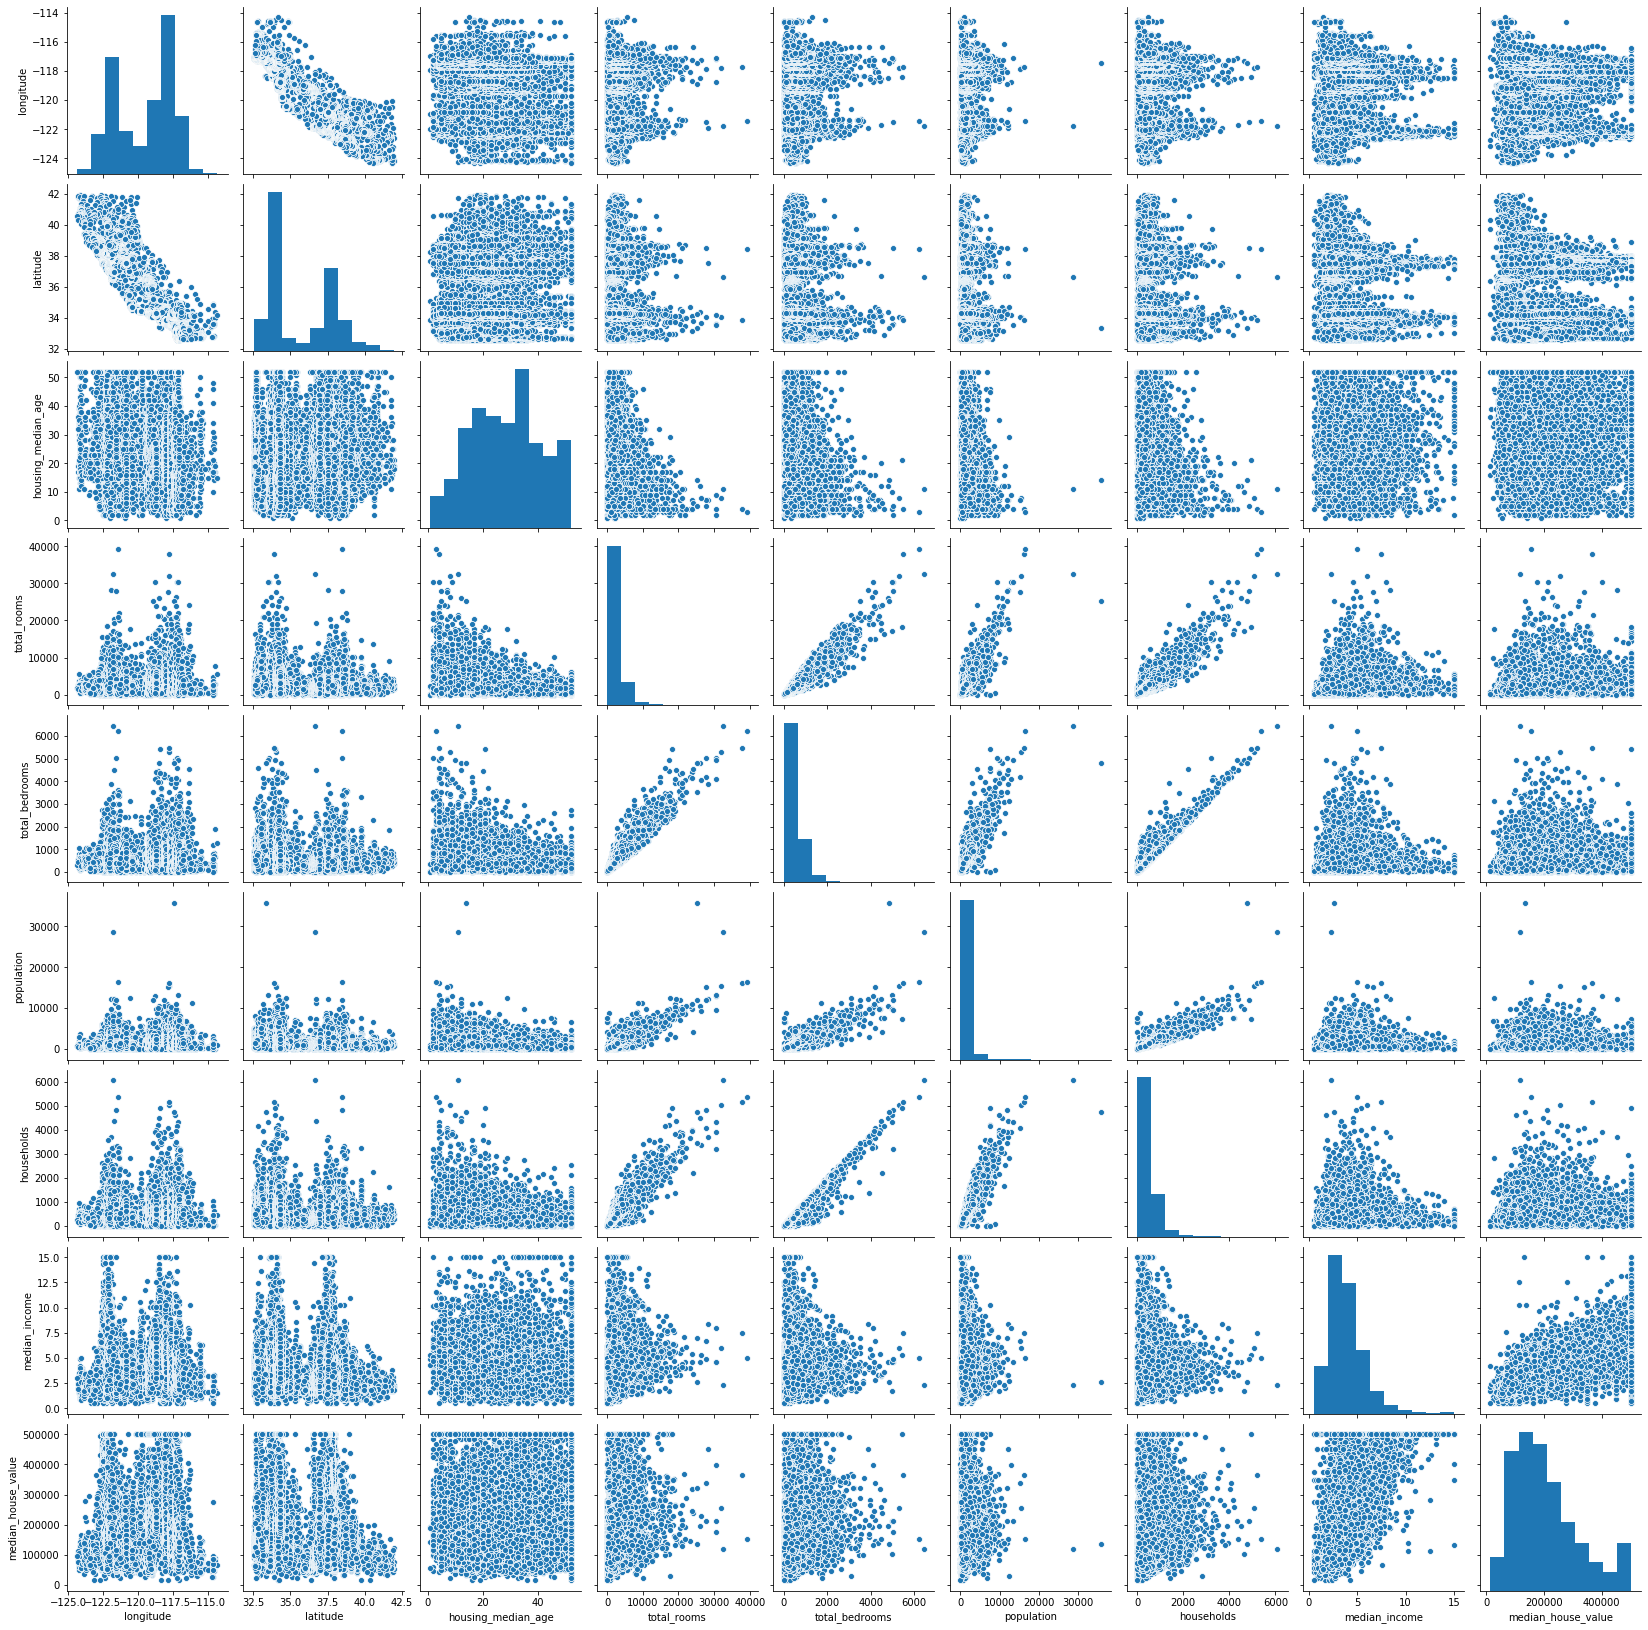

In [18]:
sns.pairplot(house_01)

the plots that seems to make a line or a spesific pattern may have a certain correlation that we can count on.
see we can almost see a line made with two attributes of total_bedrooms and households.
but when we see the plot made with two attribute of housing_median_age and median_house_values the points are destributed every where so we cant see any spesific correlation between them.

In [20]:
house_corr=house_01.corr(method="pearson")
house_corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [21]:
house_corr=house_corr.replace({1:0})
#the highest corr is between a attribute and itself
house_corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            0.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  0.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            0.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     0.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            0.000000    0.877747    0.979728      -0.007723   
population                0.877747    0.000000    0.907222       0.004834   
households                0.979728    0.907222    0.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       0.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            0.000000

In [22]:
house_corr.max()

longitude             0.099773
latitude              0.011173
housing_median_age    0.105623
total_rooms           0.930380
total_bedrooms        0.979728
population            0.907222
households            0.979728
median_income         0.688075
median_house_value    0.688075
dtype: float64

print(house_corr.max()[house_corr.max()==house_corr.max().max()].index.values)
house_corr.max().max()

as we predicted from the plots ,['total_bedrooms','households'] have the highest correlation.

The Pearson's Correlation Coefficient is also known as the Pearson Product-Moment Correlation Coefficient. It is a measure of the linear relationship between two random variables - X and Y. Mathematically, if (σXY) is the covariance between X and Y, and (σX) is the standard deviation of X, then the Pearson's correlation coefficient ρ is given by:

ρX,Y=(σX,Y)/(σX*σY)

## correlation between median_income and median_house_value:

In [23]:
print(house_corr.loc['median_house_value'].loc['median_income'])

0.6880752079585525


## correlation total_rooms and housing_median_age:


In [24]:
house_corr_02=house_01.corr(method="spearman")
house_corr_02

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.879203           -0.150752     0.040120   
latitude            -0.879203  1.000000            0.032440    -0.018435   
housing_median_age  -0.150752  0.032440            1.000000    -0.357162   
total_rooms          0.040120 -0.018435           -0.357162     1.000000   
total_bedrooms       0.063879 -0.056636           -0.306544     0.915021   
population           0.123527 -0.123626           -0.283879     0.816185   
households           0.060020 -0.074299           -0.281989     0.906734   
median_income       -0.009928 -0.088029           -0.147308     0.271321   
median_house_value  -0.069667 -0.165739            0.074855     0.205952   

                    total_bedrooms  population  households  median_income  \
longitude                 0.063879    0.123527    0.060020      -0.009928   
latitude                 -0.056636   -0.123626   -0.074299      -0.088029   
housing_median_age       -0.306544   -0.283879   -0.281989      -0.147308   
total_rooms               0.915021    0.816185    0.906734       0.271321   
total_bedrooms            1.000000    0.870937    0.975627      -0.006196   
population                0.870937    1.000000    0.903872       0.006268   
households                0.975627    0.903872    1.000000       0.030305   
median_income            -0.006196    0.006268    0.030305       1.000000   
median_house_value        0.086259    0.003839    0.112737       0.676778   

                    median_house_value  
longitude                    -0.069667  
latitude                     -0.165739  
housing_median_age            0.074855  
total_rooms                   0.205952  
total_bedrooms                0.086259  
population                    0.003839  
households                    0.112737  
median_income                 0.676778  
median_house_value            1.000000

In [25]:
print(house_corr.loc['housing_median_age'].loc['total_rooms'])

-0.3612622012223157


## correlation median_house_value and median_income:


In [26]:
house_corr_02=house_01.corr()
house_corr_02

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [27]:
print(house_corr.loc['median_house_value'].loc['median_income'])

0.6880752079585525


In [28]:
house_01[columns_01[9]].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [28]:
house_02=house_01.copy()
sns.heatmap(house_02.drop([columns_01[9]],axis=1), annot=True)